<a href="https://colab.research.google.com/github/threegenie/vgames_project/blob/main/game_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 

# read data as df
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/vgames2.csv')
df = df.drop('Unnamed: 0',axis=1)
df

Mounted at /content/drive


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [2]:
# 오류(SettingWithCopyError 발생)
pd.set_option('mode.chained_assignment', 'raise') # SettingWithCopyError

# 경고(SettingWithCopyWarning 발생, 기본 값입니다)
pd.set_option('mode.chained_assignment', 'warn') # SettingWithCopyWarning

# 무시
pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다

In [3]:
#데이터 타입 확인
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [4]:
#결측값 제거
df = df.dropna(axis=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
#년도 오류 값 결측치 처리 후 정수로 변환
df['Year'] = np.where( df['Year'] <=100,0,df['Year'] )
df['Year'] = df['Year'].replace(0,np.nan)
df.dropna(axis=0,inplace=True)
df['Year'] = df['Year'].astype(int)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
#M단위 제거
def replace_M(x):
  return x.str.replace('M','')

df['NA_Sales'] = replace_M(df['NA_Sales'])
df['EU_Sales'] = replace_M(df['EU_Sales'])
df['JP_Sales'] = replace_M(df['JP_Sales'])
df['Other_Sales'] = replace_M(df['Other_Sales'])

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [7]:
#K단위 제거
def replace_K(x):
  return x.str.replace('K','')

df['NA_Sales'] = replace_K(df['NA_Sales'])
df['EU_Sales'] = replace_K(df['EU_Sales'])
df['JP_Sales'] = replace_K(df['JP_Sales'])
df['Other_Sales'] = replace_K(df['Other_Sales'])

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [8]:
#Sales 칼럼들 전부 numeric으로 변경
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])

df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [9]:
#K단위를 M단위로 변경 - 1000배 차이이므로 0.001 곱해줌
df['NA_Sales'] = np.where( df['NA_Sales'] >= 10,df['NA_Sales']*0.001,df['NA_Sales'])
df['EU_Sales'] = np.where( df['EU_Sales'] >= 10,df['EU_Sales']*0.001,df['EU_Sales'])
df['JP_Sales'] = np.where( df['JP_Sales'] >= 10,df['JP_Sales']*0.001,df['JP_Sales'])
df['Other_Sales'] = np.where( df['Other_Sales'] >= 10,df['Other_Sales']*0.001,df['Other_Sales'])

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [10]:
#Sales 칼럼들에 1000000 곱해줌 - M단위로 변환하고 보기 쉽도록
df['NA_Sales'] = df['NA_Sales']*1000000
df['EU_Sales'] = df['EU_Sales']*1000000
df['JP_Sales'] = df['JP_Sales']*1000000
df['Other_Sales'] = df['Other_Sales']*1000000

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


In [13]:
#Sales 데이터를 int로 변환
df['NA_Sales'] = df['NA_Sales'].astype(int)
df['EU_Sales'] = df['EU_Sales'].astype(int)
df['JP_Sales'] = df['JP_Sales'].astype(int)
df['Other_Sales'] = df['Other_Sales'].astype(int)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000


In [12]:
df.dtypes

Name           object
Platform       object
Year            int64
Genre          object
Publisher      object
NA_Sales        int64
EU_Sales        int64
JP_Sales        int64
Other_Sales     int64
dtype: object

**-전처리 완료**

플랫폼/장르/게임사/년도 로 그룹지어서 각 나라별로 세일즈 비교

Text(0.5, 1.0, 'Preference of game genres by region (Unit : M)')

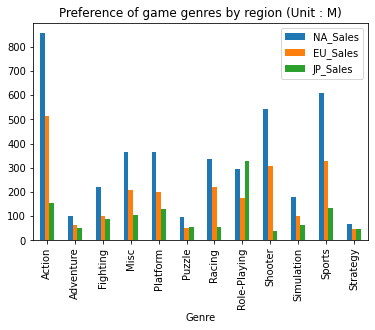

In [52]:
#지역에 따른 게임 장르 선호도 - 매출액 비교
gr = df[['Genre','NA_Sales','EU_Sales','JP_Sales']]
gr = gr.groupby('Genre').sum()/1000000 #단위 M

#label = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']

gr.plot(kind='bar')
plt.title('Preference of game genres by region (Unit : M)')

Text(0.5, 1.0, 'Preference of game platform from EU (Unit : M)')

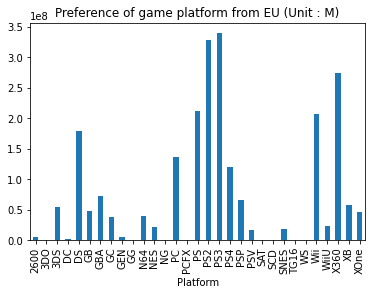

In [61]:
#지역별 게임 플랫폼 선호도

pf = df[['Platform','NA_Sales','EU_Sales','JP_Sales']]
pf = pf.groupby('Platform').sum()
pf['EU_Sales'].plot(kind='bar')
plt.title('Preference of game platform from EU (Unit : M)')

Text(0.5, 1.0, 'Preference of game platform from NA (Unit : M)')

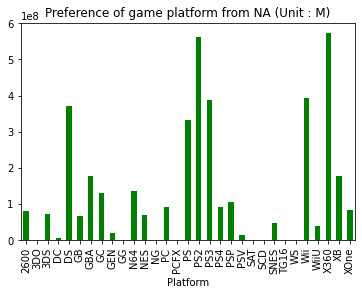

In [62]:
pf['NA_Sales'].plot(kind='bar',color='green')
plt.title('Preference of game platform from NA (Unit : M)')

Text(0.5, 1.0, 'Preference of game platform from JP (Unit : M)')

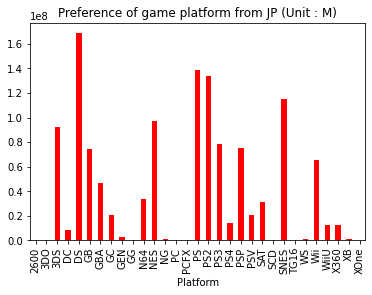

In [63]:
pf['JP_Sales'].plot(kind='bar',color='red')
plt.title('Preference of game platform from JP (Unit : M)')